# Import Libs

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_array = cv2.imread('../input/mrl-dataset/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

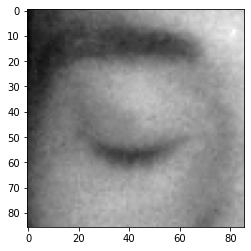

In [4]:
plt.imshow(img_array, cmap="gray")

In [5]:
img_array.shape

(86, 86)

In [6]:
import os

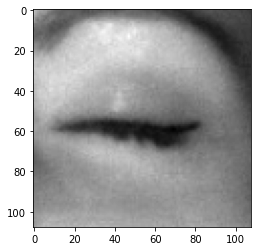

In [7]:
Datadirectory = '../input/mrl-dataset/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

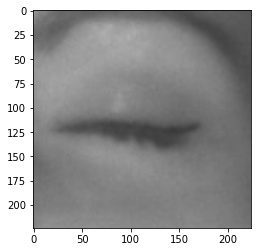

In [8]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [9]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass
   

In [10]:
create_training_data()

In [11]:
print(len(training_data))

4000


In [12]:
import random
random.shuffle(training_data)

In [13]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [14]:
X.shape

(4000, 224, 224, 3)

In [15]:
X = X/255.0

In [16]:
Y = np.array(y)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)
#Note: Increase the number of epoch to get more appropriate result, accuracy.

Epoch 1/2
113/113 [==============================] - 412s 4s/step - loss: 0.0774 - accuracy: 0.9682 - val_loss: 0.3019 - val_accuracy: 0.9650
Epoch 2/2
113/113 [==============================] - 407s 4s/step - loss: 2.5519e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9975


In [27]:
new_model.save('my_model.h5')

In [28]:
new_model = tf.keras.models.load_model('my_model.h5')

In [29]:
img_array = cv2.imread('../input/mrl-dataset/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [30]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [31]:
X_input.shape

(1, 224, 224, 3)

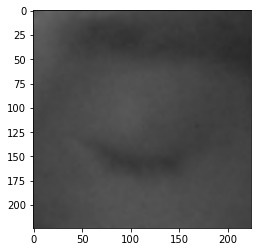

In [32]:
plt.imshow(new_array)

In [33]:
X_input = X_input/255.0

In [34]:
prediction = new_model.predict(X_input)

In [35]:
prediction

array([[8.970149e-09]], dtype=float32)

In [36]:
img = cv2.imread('../input/test-eyes/open men.jpg')

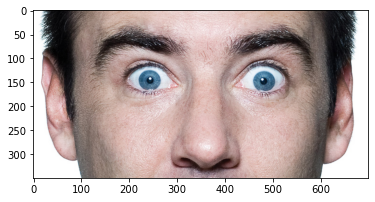

In [37]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [40]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [41]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

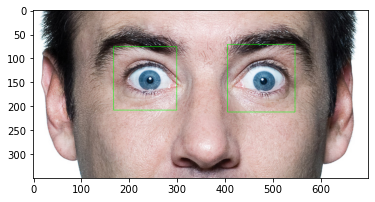

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [43]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

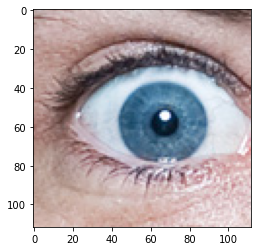

In [44]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [45]:
eyes_roi.shape

(112, 112, 3)

In [46]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [47]:
new_model.predict(final_img)

array([[1.]], dtype=float32)